# <b>Insurance</b><a id='home'></a>

1. [Import Data and Packages](#import)
2. [Prepare Data](#prepare)
3. [Exploratory Data Analysis](#exploratory)

## <b>Import Packages and Data</b><a id='import'></a>

In [1]:
# Import Packages
import numpy as np 
import pandas as pd

In [2]:
# Read data
try:
    insure = pd.read_csv('/Users/kellyshreeve/Desktop/Data-Sets/insurance_us.csv')
except:
    insure = pd.read_csv('/datasets/insurance_us.csv')

In [3]:
# Print info
print(insure.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


There are 5000 rows in the dataset and no missing values. All data types are correct.

In [5]:
# Print head
display(insure.head(10))

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


### Read data conclusions

This analysis has one dataset containing 5 columns and 5000 rows. Columns represent insurance clients' gender, age, salary, number of family members, and insurance benefits. Column names need to be changed to snake case. There are no missing values.

[back to top](#home)

## <b>Prepare Data</b><a id='prepare'></a>

Column names are changed to snake case, dataset is checked for duplicates, and a binary filed claim feature is added.

### Fix columns names

In [8]:
# Change columns to snake case
insure.columns = insure.columns.str.lower().str.replace(' ', '_')

print(insure.columns)

Index(['gender', 'age', 'salary', 'family_members', 'insurance_benefits'], dtype='object')


Columns are converted to snake case.

### Check for Duplicates

In [10]:
# Check for full duplicates
num_duplicates = insure.duplicated().sum()

print(f'The number of fully duplicated rows: {num_duplicates}')

The number of fully duplicated rows: 153


While there are duplicated rows, this is likely due to multiple people sharing the same gender, age, salary, family members, and insurance benefits. These duplicates will be left in the dataset.

### Add additional Features

In [103]:
# Add binary filed claim variable where
# 0 = filed no claims and 1 = filed at least one claime
insure['recieved_benefit'] = np.where(insure['insurance_benefits'] > 0, 1, 0)

display(insure.head())

,gender,age,salary,family_members,insurance_benefits,filed_claim,recieved_benefit
0,1,41.0,49600.0,1,0,0,0
1,0,46.0,38000.0,1,1,1,1
2,0,29.0,21000.0,0,0,0,0
3,0,21.0,41700.0,2,0,0,0
4,1,28.0,26100.0,0,0,0,0


### Prepare data conclusions

Variable names are snake case, duplicates have been explored, and a binary filed claim feature is added. The data is ready for analysis.

### <b>Exploratory Data Analysis</b><a id='exploratory'></a>

Distributions of each feature are explored.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'family_members'}>,
        <Axes: title={'center': 'insurance_benefits'}>]], dtype=object)

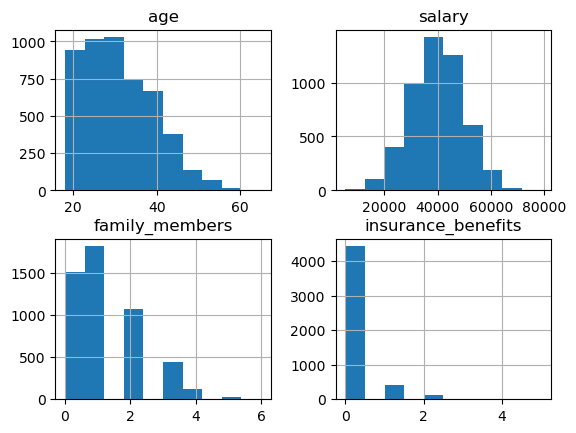

In [99]:
# Histograms of age, salary, family members, and insurance benefits
insure.iloc[:, 1:5].hist()

Age, family members, and insurance benefits are highly right skewed. Salary appears normally distributed.

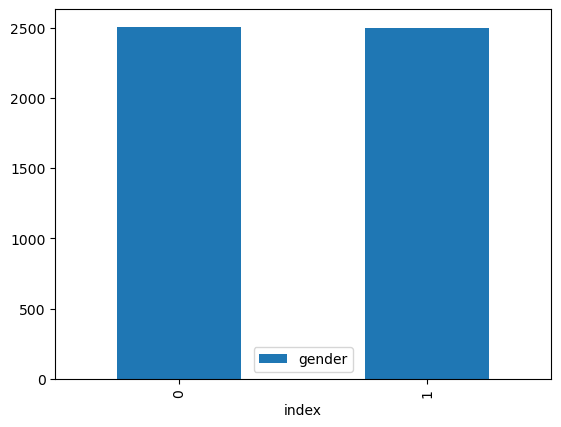

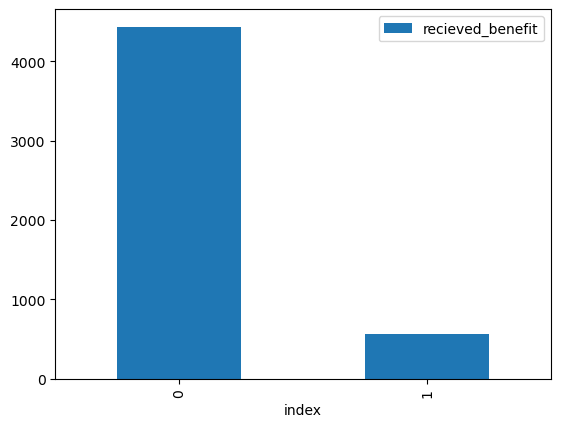

In [104]:
# Bar graphs of gender and filed claim
columns = ['gender', 'recieved_benefit']

for column in columns:
    insure[column].value_counts().reset_index().plot.bar(x='index', y=[column])

There are similar numbers of men and women in the dataset. Far more people didn't recieve a benefit than did.

In [105]:
# Frequency/Rel Freq/Cum Rel Feq table of gender, family members,
# total insurance benefits, and filed claim
columns = ['gender', 'family_members', 'insurance_benefits', 'recieved_benefit']

for column in columns:
    freq_table = insure[column].value_counts().sort_index().reset_index()

    freq_table['Relative Frequency'] = (insure[column]
                                             .value_counts(normalize=True)
                                             .sort_index()
                                             .values)

    freq_table['Cumulative Frequency'] = (insure[column]
                                               .value_counts(normalize=True)
                                               .sort_index()
                                               .cumsum().values)

    freq_table = freq_table.rename(columns={'index':'Claims Number',
                                            column:'Frequency'})
                                   
    print(f'Frequency Table {column}:')
    display(freq_table)


Frequency Table gender:


,Claims Number,Frequency,Relative Frequency,Cumulative Frequency
0,0,2505,0.501,0.501
1,1,2495,0.499,1.000


Frequency Table family_members:


,Claims Number,Frequency,Relative Frequency,Cumulative Frequency
0,0,1513,0.3026,0.3026
1,1,1814,0.3628,0.6654
2,2,1071,0.2142,0.8796
3,3,439,0.0878,0.9674
4,4,124,0.0248,0.9922
5,5,32,0.0064,0.9986
6,6,7,0.0014,1.0000


Frequency Table insurance_benefits:


,Claims Number,Frequency,Relative Frequency,Cumulative Frequency
0,0,4436,0.8872,0.8872
1,1,423,0.0846,0.9718
2,2,115,0.0230,0.9948
3,3,18,0.0036,0.9984
4,4,7,0.0014,0.9998
5,5,1,0.0002,1.0000


Frequency Table recieved_benefit:


,Claims Number,Frequency,Relative Frequency,Cumulative Frequency
0,0,4436,0.8872,0.8872
1,1,564,0.1128,1.0000


There are almost equal numbers of men and women in the dataset. Of customers in this dataset, the most common number of family members is one with 36.38% having one family member, followed by 30.26% having no family members. Only 3.26% of customers have 4 or more family members.  88.72% recieved no insurance benefits, while only 8.46% recieved one benefit, and 2.82% recieved two or more benefits. Similarly, 88.72% of customers recieved no benefit vs 11.28% recieved at least one benefit. This is an imbalanced classification problem.

### Exploratory Data Analysis Conclusion

Age, family members, and insurance benefits are all highly right skewed variables. Some of the categories in family members and insurance benefits have very few observations. The imbalance in the numbers of those who did and did not recieve benefits would make this an imbalanced classification problem.